In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer, SplineTransformer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

# CMSE 381, Fundamental Data Science Methods
## Homework 8, Fall 2025

**Name:** Monis, Lowell

---

### Question 1: ISLP $\S$ 9.7.3

Only a subset of these problems are to be answered. Here we explore the maximal margin classifier on a toy data set.

#### (a) We are given $n = 7$ observations in $p = 2$ dimensions. For each observation, there is an associated class label. Sketch the observations.

|Obs.|$X1$|$X2$|$Y$|
|----|----|----|---|
| 1  | 3  | 4  |Red|
| 2  | 2  | 2  |Red|
| 3  | 3  | 4  |Red|
| 4  | 1  | 4  |Red|
| 5  | 2  | 1  |Blue|
| 6  | 4  | 3  |Blue|
| 7  | 4  | 1  |Blue|

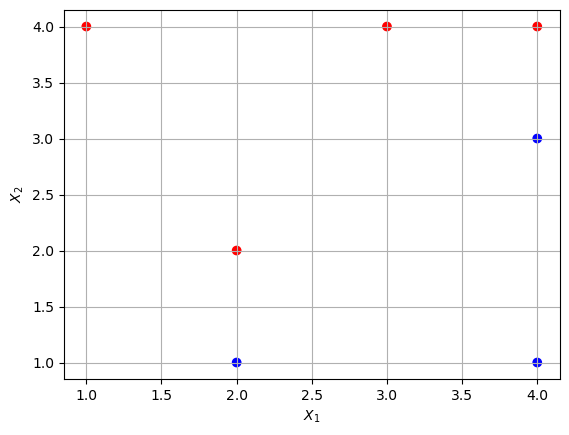

In [2]:
x1=[3,2,4,1,2,4,4]
x2=[4,2,4,4,1,3,1]
y=['red','red','red','red','blue','blue','blue']
plt.scatter(x1,x2,c=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.show()

#### (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form in ISLP Equation $\S$ 9.1).

$$Y=\frac{1}{2}-X_1+X_2$$

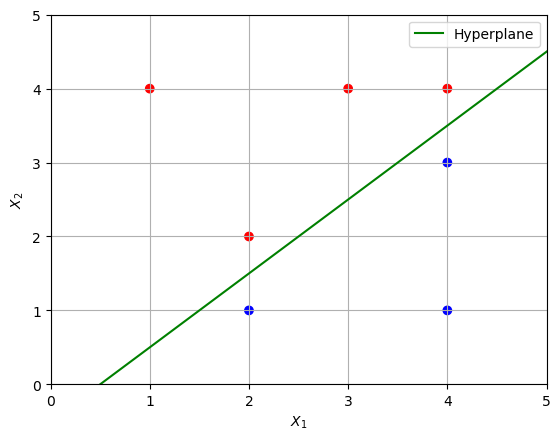

In [3]:
plt.scatter(x1,x2,c=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.plot([0.5,5.5],[0,5],ls='solid', c='green', label='Hyperplane')
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.show()

#### (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if $\beta_0 + \beta_1X_1 + \beta_2X_2>0$, and classify to Blue otherwise.” Provide the values for $\beta_0$, $\beta_1$, and $\beta_2$.

The classification rule for the maximal margin classifier is as follows:

Classify to Red if $\frac{1}{2} - X_1 + X_2>0$

Classify to Blue if $\frac{1}{2} - X_1 + X_2<0$

Here, $\beta_0=\frac{1}{2}, \beta_1=-1, \beta_2=1$.

#### (d) On your sketch, indicate the margin for the maximal margin hyperplane.

The margin is the minimum distance from the support vectors to the hyperplane. We can compute this margin using $Y(\beta_0+\beta_1X_1+\beta_2X_2)$. We can then sketch the margin on the existing plot from the support vectors.

In [4]:
min(abs(-np.array(x1)+np.array(x2)+0.5))

0.5

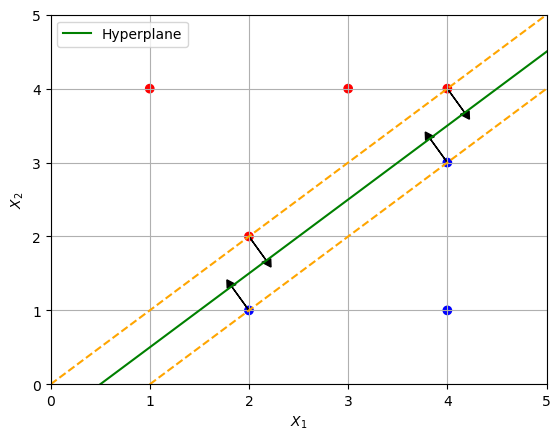

In [5]:
plt.scatter(x1,x2,c=y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.plot([1,2,4,6],[0,1,3,5],ls='--', c='orange')
plt.plot([0,2,5],[0,2,5],ls='--', c='orange')
plt.plot([0.5,5.5],[0,5],ls='solid', c='green', label='Hyperplane')
plt.arrow(2,2,0.175,-0.325,head_width=0.1,head_length=0.1,fc='black')
plt.arrow(2,1,-0.175,+0.325,head_width=0.1,head_length=0.1,fc='black')
plt.arrow(4,3,-0.175,+0.325,head_width=0.1,head_length=0.1,fc='black')
plt.arrow(4,4,0.175,-0.325,head_width=0.1,head_length=0.1,fc='black')
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend()
plt.show()

The margin is 0.5 units.

#### (e) Indicate the support vectors for the maximal margin classifier.

The support vectors are the points that are closest to the hyperplane. All of the support vectors are equidistant from the hyperplane, with the distance being equal to the margin. There are four such support vectors for this maximal margin classifier. These are $(2,1)$, $(4,3)$, $(2,2)$, and $(4,4)$.

#### (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.

Observation 7, which is $(4,1)$, is not a support vector. Thus, if this observation is moved slightly, it will not change the margins, or the hyperplane, since these depend on the points closest to the optimal boundary, or the support vectors.

### Question 2: ISLP $\S$ 9.7.8

This problem involves the `OJ` data set which is part of the `ISLP` package. The problem has been slightly modified from the textbook version by the instructors.

#### (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

I am going to use seed `381` to split the data after pre-processing it. I will then scale the data.

In [6]:
scaler=StandardScaler()
oj=pd.read_csv('../data/OJ.csv').rename({'Unnamed: 0': ''}, axis=1).set_index('')
X=pd.get_dummies(oj.drop('Purchase', axis=1), drop_first=True)
y=oj['Purchase']
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=800, random_state=381)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#### (b) Fit a support vector classifier to the training data using `C = 1`, with `Purchase` as the response and the other variables as predictors. How many support points are there?

We can now train a support vector classifier to the training data using the given hyperparameter.

In [7]:
svc = SVC(C=1, kernel='linear', random_state=381)
svc.fit(X_train,y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


We can now query the number of support points used.

In [8]:
len(svc.support_)

324

#### (c) What are the training and test error rates?

We can compute the training and test classification errors as follows:

In [9]:
1-accuracy_score(y_train, svc.predict(X_train))

0.15249999999999997

In [10]:
1-accuracy_score(y_test, svc.predict(X_test))

0.18518518518518523

The training error rate is 15.250%, and the test error is slightly higher (as expected), at 18.519%.

#### (d) Use cross-validation to select an optimal `C`. Consider values in the range 0.01 to 10.

First, I am defining a good list of candidate values for `C`. I will then use a `GridSearchCV` model fitted to identify the optimal value using $5$-fold cross-validation. I will continue using the `linear` kernel.

In [11]:
C_list = [0.01, 0.1, 1, 10]
tuned_parameters = [{'C': C_list}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=5, scoring='accuracy', refit=True)
clf.fit(X_train, y_train)

,estimator,SVC(kernel='linear')
,param_grid,"[{'C': [0.01, 0.1, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,0.1


I will now query and store the optimal value of `C` from the tuned model.

In [12]:
opt_C=clf.best_params_
print(opt_C)

{'C': 0.1}


#### (e) Compute the training and test error rates using this new value for `C`.

I will use the `predict()` method of the `clf` object, which will use `C=0.1` as its optimal parameter.

In [13]:
1-accuracy_score(y_train, clf.predict(X_train))

0.15375000000000005

In [14]:
1-accuracy_score(y_test, clf.predict(X_test))

0.18518518518518523

The training error has been updated to 15.375% and the test error is maintained at 18.519%.

#### (f) Repeat parts (b) through (e) using a support vector machine with a radial kernel. Use the default value for `gamma`.

We first use `C=1` to train the SVC model.

In [15]:
svc_rbf = SVC(C=1, kernel='rbf', random_state=381)
svc_rbf.fit(X_train,y_train)
len(svc_rbf.support_)

371

There are 371 support vectors in this model. We can now compute the errors.

In [16]:
1-accuracy_score(y_train, svc_rbf.predict(X_train))

0.14749999999999996

In [17]:
1-accuracy_score(y_test, svc_rbf.predict(X_test))

0.1777777777777778

It looks like the error rates have decreased with training error set at 14.750% and test error at 17.778%.

I can now proceed with a $5$-fold cross-validation to determine the ideal value for `C`, keeping the value of `gamma` at its default.

In [18]:
C_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
tuned_parameters = [{'C': C_list}]
clf_rbf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=5, scoring='accuracy', refit=True)
clf_rbf.fit(X_train, y_train)
print(clf_rbf.best_params_)

{'C': 0.5}


Finally, I will print the error rates associated with using the optimal `C` value.

In [19]:
1-accuracy_score(y_train, clf_rbf.predict(X_train))

0.15000000000000002

In [20]:
1-accuracy_score(y_test, clf_rbf.predict(X_test))

0.18148148148148147

The training error is set at 15.000% and test error at 18.148%.

#### (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set `degree = 2`.

We first use `C=1` to train the SVC model.

In [21]:
svc_poly = SVC(C=1, kernel='poly', degree=2, random_state=381)
svc_poly.fit(X_train,y_train)
len(svc_poly.support_)

512

There are 512 support vectors in this model. We can now compute the errors.

In [22]:
1-accuracy_score(y_train, svc_poly.predict(X_train))

0.22624999999999995

In [23]:
1-accuracy_score(y_test, svc_poly.predict(X_test))

0.21111111111111114

The training error is set at 22.625% and test error at 21.111%.

I can now proceed with a $5$-fold cross-validation to determine the ideal value for `C`.

In [24]:
C_list = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
tuned_parameters = [{'C': C_list}]
clf_poly = GridSearchCV(SVC(kernel='poly', degree=2), tuned_parameters, cv=5, scoring='accuracy')
clf_poly.fit(X_train, y_train)
print(clf_poly.best_params_)

{'C': 2}


Finally, I will print the error rates associated with using the optimal `C` value.

In [25]:
1-accuracy_score(y_train, clf_poly.predict(X_train))

0.22624999999999995

In [26]:
1-accuracy_score(y_test, clf_poly.predict(X_test))

0.21851851851851856

The training error is set at 22.625% and test error at 21.852%.

#### (h)  Overall, which approach seems to give the best results on this data?

From the linear, radial, and polynomial kernels, it looks like using a radial kernel with `C=0.5` has given us the most optimal result with the lowest classification error rates in both training and test. The errors, however, are only marginally less than when using a linear
kernel with `C=0.1`. Using the polynomial kernel with degree 2 also provides a unique scenario where the testing error is less than the training error, which could be indicative of data leakage or class
imbalance.